In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import Lasso
import lightgbm as lgb
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import Lasso
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
!ls

'2021 ACA HS-SPME-GC-VUV-MS beer volatiles_DZ.pdf'  'Previous Work'
'2021 ACA LC-QTOF beer styles_HEA.pdf'		     beer2-updated.csv
'Beer Project - Data Science.pptx'		     beer2.csv
 Beer_Dataset2.csv				     beer2_ds.csv
'Final copy 3.ipynb'				     beer_ds.csv
 Preprocessing_Data_collection.pptx		    'other work'
 Presentation


In [5]:
beer = pd.read_csv("beer2_ds.csv")

In [6]:
beer

,Sample,Class,QC,0,1,2,3,4,5,6,...,2676,2677,2678,2679,2680,2681,2682,2683,2684,2685
0,5102023_All_QC_003,All,1,1206145,1274830,2207415,4359182,177840,269556,1036610,...,47968,91172,137430,81283,58446,1579045,33833,70105,12436,53816
1,5102023_All_QC_040,All,1,892381,945133,1688109,3208560,135325,478907,539238,...,35206,57453,4010,60423,63424,1472180,62940,76586,11361,44397
2,5102023_BLD_1_022,Blonde,0,967402,1039500,3407085,1738776,449647,727863,923668,...,39964,11866,8123,96319,61191,8758,54,90265,18840,372
3,5102023_BLD_2_023,Blonde,0,984546,1056546,3539493,1735118,225435,150396,4340521,...,13800,6044,5769,8975,5635,2848,262,78235,15432,231
4,5102023_BLD_QC_021,Blonde,1,986604,1059673,1855423,3381080,146978,148355,610422,...,38476,22734,7539,39845,27754,5043,62,78880,9340,254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,592023_STU_2_008,Stout,0,926734,991006,1746892,3100788,1033615,1424326,1402140,...,17666,10654,221774,137235,101334,2832827,44758,14757,857,80338
67,592023_STU_QC_006,Stout,1,964519,1022076,1842175,3425686,654969,1449777,1478993,...,7289,26478,354104,114836,85896,1770868,22828,20829,1139,71852
68,592023_WHE_1_027,Wheat,0,823458,872604,1530622,2835754,342958,433742,1331621,...,133123,41372,3170,36145,41646,7085,67,49520,2875,106
69,592023_WHE_2_028,Wheat,0,817188,858183,1485663,2986838,168233,254985,1263554,...,3149,15489,8732,47852,25502,4663319,155583,50530,4166,126671


In [7]:
beer.isnull().sum()

Sample    0
Class     0
QC        0
0         0
1         0
         ..
2681      0
2682      0
2683      0
2684      0
2685      0
Length: 2689, dtype: int64

In [8]:
beer.columns

Index(['Sample', 'Class', 'QC', '0', '1', '2', '3', '4', '5', '6',
       ...
       '2676', '2677', '2678', '2679', '2680', '2681', '2682', '2683', '2684',
       '2685'],
      dtype='object', length=2689)

# Data Exploration and Normalization

Observing min and max feature values for each sample, the higher the feature value the more prevalent the feature is in this sample

In [9]:
#feature values (excluding the label and sample names)
feature_values = beer.iloc[:, 1:].values

# maximum value for each feature
max_feature_values = np.max(feature_values, axis=0)

# minimum value for each feature
min_feature_values = np.min(feature_values, axis=0)

result_df = pd.DataFrame({
    'Feature Index': range(1, len(max_feature_values) + 1),
    'Min Feature Value': min_feature_values,
    'Max Feature Value': max_feature_values})
print(result_df)


      Feature Index Min Feature Value Max Feature Value
0                 1               All             Wheat
1                 2                 0                 1
2                 3            479734           1315544
3                 4            507948           1759020
4                 5            466169           4088947
...             ...               ...               ...
2683           2684                 0           6472603
2684           2685                 0            241154
2685           2686                 0            407731
2686           2687                 0            444990
2687           2688                 0            246497

[2688 rows x 3 columns]


In [10]:
beer.index

RangeIndex(start=0, stop=71, step=1)

#  Normalizing Feature Values


In [11]:
#extracting only the feature columns (excluding the quality control column)
numeric_columns = beer.select_dtypes(include=['int64']).columns[1:]
X_features = beer[numeric_columns]
#apply z-score normalization
X_normalized = (X_features - X_features.mean()) / X_features.std()
#replacing original feature values with normalized values
beer[numeric_columns] = X_normalized

In [12]:
beer

,Sample,Class,QC,0,1,2,3,4,5,6,...,2676,2677,2678,2679,2680,2681,2682,2683,2684,2685
0,5102023_All_QC_003,All,1,1.809258,1.194079,0.459027,1.725280,-0.662678,-0.757899,-0.122617,...,0.625009,1.232157,1.053329,0.591885,0.493292,0.359014,-0.023946,0.423856,-0.018859,0.254570
1,5102023_All_QC_040,All,1,0.094267,-0.062359,-0.191927,0.757690,-0.737201,-0.432879,-0.595712,...,0.279311,0.462032,-0.365107,0.033474,0.639567,0.293633,0.449159,0.550038,-0.038908,0.099415
2,5102023_BLD_1_022,Blonde,0,0.504321,0.297263,1.962822,-0.478292,-0.186236,-0.046372,-0.230046,...,0.408196,-0.579153,-0.321381,0.994390,0.573952,-0.601711,-0.572990,0.816360,0.100581,-0.625789
3,5102023_BLD_2_023,Blonde,0,0.598028,0.362223,2.128796,-0.481368,-0.579250,-0.942896,3.020027,...,-0.300538,-0.712125,-0.346407,-1.343762,-1.058524,-0.605327,-0.569609,0.582143,0.037019,-0.628112
4,5102023_BLD_QC_021,Blonde,1,0.609277,0.374140,0.017802,0.902767,-0.716775,-0.946064,-0.528002,...,0.367889,-0.330933,-0.327589,-0.517389,-0.408572,-0.603984,-0.572860,0.594701,-0.076601,-0.627733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,592023_STU_2_008,Stout,0,0.282036,0.112458,-0.118242,0.667061,0.837384,1.034895,0.225071,...,-0.195815,-0.606835,1.950021,2.089690,1.753527,1.126097,0.153629,-0.653737,-0.234815,0.691456
67,592023_STU_QC_006,Stout,1,0.488563,0.230862,0.001196,0.940277,0.173667,1.074408,0.298173,...,-0.476908,-0.245422,3.356869,1.490081,1.299892,0.476375,-0.202821,-0.535519,-0.229556,0.551670
68,592023_WHE_1_027,Wheat,0,-0.282456,-0.338759,-0.389338,0.444187,-0.373248,-0.502998,0.157994,...,2.931697,0.094750,-0.374038,-0.616436,-0.000365,-0.602734,-0.572779,0.023078,-0.197178,-0.630171
69,592023_WHE_2_028,Wheat,0,-0.316727,-0.393716,-0.445694,0.571238,-0.679518,-0.780520,0.093250,...,-0.589053,-0.496406,-0.314906,-0.303046,-0.474745,2.246020,1.954979,0.042743,-0.173100,1.454679


In [13]:
# Removing 'Sample' column, it is not needed for this analysis
data_cleaned = beer.drop(['Sample'], axis=1)
missing_values = data_cleaned.isnull().sum().sum()
unique_classes = data_cleaned['Class'].unique()
qc_distribution = data_cleaned['QC'].value_counts(normalize=True)
missing_values, unique_classes, qc_distribution

(0,
 array(['All', 'Blonde', 'German', 'IPA', 'Sour', 'Stout', 'Wheat'],
       dtype=object),
 0    0.676056
 1    0.323944
 Name: QC, dtype: float64)

In [14]:
# Exclude QC samples
data_no_qc = data_cleaned[data_cleaned['QC'] == 0].drop('QC', axis=1)

# exclude 'All' and 'Water' classes
data_final = data_no_qc[~data_no_qc['Class'].isin(['All', 'Water'])]

# Encode the 'Class' column using label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_final['Class'] = le.fit_transform(data_final['Class'])

# Prepare features (X) and target (y) for model training
X = data_final.drop('Class', axis=1)
y = data_final['Class']



In [15]:
# Feature scaling using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows of the scaled features and the encoded classes
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df['Class'] = y.reset_index(drop=True)  # Reset index for proper alignment

X_scaled_df.head(), le.classes_

(          0         1         2         3         4         5         6  \
 0  0.464375  0.371579  1.993775 -0.453424 -0.194811  0.009035 -0.260646   
 1  0.558462  0.441077  2.152566 -0.456548 -0.907172 -0.996273  2.494653   
 2  0.421442  0.297813  0.072168  1.016695 -1.173317 -1.009562 -0.662752   
 3  0.423242  0.295224  0.055786  0.716370 -0.929587 -0.220180 -0.777497   
 4  0.271388  0.196889  0.030773  1.024401 -0.270755 -0.528471 -0.349617   
 
           7         8         9  ...      2677      2678      2679      2680  \
 0 -0.569478 -0.796027 -0.091483  ... -0.443769 -0.267325  0.956375  0.609127   
 1 -0.597264 -0.811228  1.657820  ... -0.574190 -0.294391 -1.276755 -0.981558   
 2 -0.618983 -0.829505 -0.255488  ... -0.275288 -0.251365 -0.394487 -0.387098   
 3 -0.628998 -0.525684 -0.804922  ... -0.335817 -0.330357 -0.083642 -0.648280   
 4 -0.157984  1.302451 -0.551813  ... -0.385167 -0.323918 -0.418290 -0.255734   
 
        2681      2682      2683      2684      2685  

### Feature Importance

In [16]:
# Printing top 20 features for each model
def display_top_features_table(model_name, top_features, top_importances):
    plt.figure(figsize=(10, 8))
    plt.title(f'Top 20 Features ({model_name})')
    plt.bar(range(len(top_features)), top_importances, color='r', align='center')
    plt.xticks(range(len(top_features)), top_features, rotation=90)
    plt.xlim([-1, len(top_features)])
    plt.ylabel('Importance')
    plt.xlabel('Feature')
    plt.tight_layout()
    plt.show()
    
    # Display the top features in a DataFrame
    top_features_importances = pd.DataFrame({'Feature': top_features, 'Importance': top_importances})
    print(top_features_importances)


In [17]:
# #PCA and TSNE plots
# def plot_pca_tsne(X_scaled, y, top_features_indices, model_name):
#     # Selecting only the top 20 features for t-SNE visualization
#     X_top_features = X_scaled[:, top_features_indices]
    
#     # Initialize and fit the t-SNE model
#     tsne = TSNE(n_components=2, random_state=42)
#     X_tsne = tsne.fit_transform(X_top_features)
    
#     # Initialize and fit the PCA model
#     pca = PCA(n_components=2, random_state=42)
#     X_pca = pca.fit_transform(X_top_features)
    
#     # Plotting side by side
#     fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    
#     # Plot t-SNE visualization
#     axes[0].set_title(f't-SNE Visualization of Beer Classes ({model_name} - Top 20 Features)')
#     for class_id in np.unique(y):
#         axes[0].scatter(X_tsne[y == class_id, 0], X_tsne[y == class_id, 1], label=le.inverse_transform([class_id])[0])
#     axes[0].set_xlabel('t-SNE 1')
#     axes[0].set_ylabel('t-SNE 2')
#     axes[0].legend()
    
#     # Plot PCA visualization
#     axes[1].set_title(f'PCA Visualization of Beer Classes ({model_name} - Top 20 Features)')
#     for class_id in np.unique(y):
#         axes[1].scatter(X_pca[y == class_id, 0], X_pca[y == class_id, 1], label=le.inverse_transform([class_id])[0])
#     axes[1].set_xlabel('Principal Component 1')
#     axes[1].set_ylabel('Principal Component 2')
#     axes[1].legend()
    
#     plt.tight_layout()
#     plt.show()

In [18]:
# def plot_pca_tsne(X_scaled, y, top_features_indices, model_name):
#     # Selecting only the top 20 features for t-SNE visualization
#     X_top_features = X_scaled[:, top_features_indices]
    
#     # Initialize and fit the t-SNE model
#     tsne = TSNE(n_components=2, random_state=42)
#     X_tsne = tsne.fit_transform(X_top_features)
    
#     # Initialize and fit the PCA model
#     pca = PCA(n_components=2, random_state=42)
#     X_pca = pca.fit_transform(X_top_features)
    
#     # Plotting side by side
#     fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    
#     # Plot t-SNE visualization
#     axes[0].set_title(f't-SNE Visualization of Beer Classes ({model_name})', fontsize=16, fontweight='bold')
#     for class_id in np.unique(y):
#         axes[0].scatter(X_tsne[y == class_id, 0], X_tsne[y == class_id, 1], label=le.inverse_transform([class_id])[0])
#     axes[0].set_xlabel('t-SNE 1')
#     axes[0].set_ylabel('t-SNE 2')
#     axes[0].legend()
    
#     # Plot PCA visualization
#     axes[1].set_title(f'PCA Visualization of Beer Classes ({model_name})', fontsize=16, fontweight='bold')
#     for class_id in np.unique(y):
#         axes[1].scatter(X_pca[y == class_id, 0], X_pca[y == class_id, 1], label=le.inverse_transform([class_id])[0])
#     axes[1].set_xlabel('Principal Component 1')
#     axes[1].set_ylabel('Principal Component 2')
#     axes[1].legend()
    
#     plt.tight_layout()
#     plt.show()


In [19]:
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
# import numpy as np

# def plot_pca_tsne(X_scaled, y, top_features_indices, model_name):
#     # Selecting only the top 20 features for t-SNE visualization
#     X_top_features = X_scaled[:, top_features_indices]
    
#     # Initialize and fit the t-SNE model
#     tsne = TSNE(n_components=2, random_state=42)
#     X_tsne = tsne.fit_transform(X_top_features)
    
#     # Initialize and fit the PCA model
#     pca = PCA(n_components=2, random_state=42)
#     X_pca = pca.fit_transform(X_top_features)
    
#     # Plotting side by side
#     fig, axes = plt.subplots(1, figsize=(18, 8))
    
#     # Plot t-SNE visualization
#     axes[0].set_title(f't-SNE Visualization of Beer Classes ({model_name} )', fontsize=16, fontweight='bold')
#     for class_id in np.unique(y):
#         axes[0].scatter(X_tsne[y == class_id, 0], X_tsne[y == class_id, 1], label=le.inverse_transform([class_id])[0])
#     axes[0].set_xlabel('t-SNE 1', fontsize=14, fontweight='bold')
#     axes[0].set_ylabel('t-SNE 2', fontsize=14, fontweight='bold')
#     axes[0].legend()
    
#     # Plot PCA visualization
#     axes[1].set_title(f'PCA Visualization of Beer Classes ({model_name} - Top 20 Features)', fontsize=16, fontweight='bold')
#     for class_id in np.unique(y):
#         axes[1].scatter(X_pca[y == class_id, 0], X_pca[y == class_id, 1], label=le.inverse_transform([class_id])[0])
#     axes[1].set_xlabel('Principal Component 1', fontsize=14, fontweight='bold')
#     axes[1].set_ylabel('Principal Component 2', fontsize=14, fontweight='bold')
#     axes[1].legend()
    
#     plt.tight_layout()
#     plt.show()


In [20]:
def plot_pca_tsne(X_scaled, y, top_features_indices, model_name):
    # Selecting only the top 20 features for t-SNE visualization
    X_top_features = X_scaled[:, top_features_indices]
    
    # Initialize and fit the t-SNE model
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X_top_features)
    
    # Initialize and fit the PCA model
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X_top_features)
    
    # Plotting side by side
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    # Calculate the total variance explained by the principal components
    total_variance_explained = np.sum(pca.explained_variance_ratio_)
    
    # Plot t-SNE visualization
    axes[0].set_title(f't-SNE Visualization of Beer Classes ({model_name})', fontsize=16, fontweight='bold')
    for class_id in np.unique(y):
        axes[0].scatter(X_tsne[y == class_id, 0], X_tsne[y == class_id, 1], label=le.inverse_transform([class_id])[0])
    axes[0].set_xlabel('t-SNE 1', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('t-SNE 2', fontsize=14, fontweight='bold')
    axes[0].legend()
    
    # Plot PCA visualization
    axes[1].set_title(f'PCA Visualization of Beer Classes ({model_name})', fontsize=16, fontweight='bold')
    for class_id in np.unique(y):
        axes[1].scatter(X_pca[y == class_id, 0], X_pca[y == class_id, 1], label=le.inverse_transform([class_id])[0])
    axes[1].set_xlabel('Principal Component 1', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Principal Component 2', fontsize=14, fontweight='bold')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()


## Random Forest
Ensemble learning method based on decision trees.
Constructs multiple decision trees during training and outputs the mode of the classes (classification) or mean prediction (regression) of the individual trees.

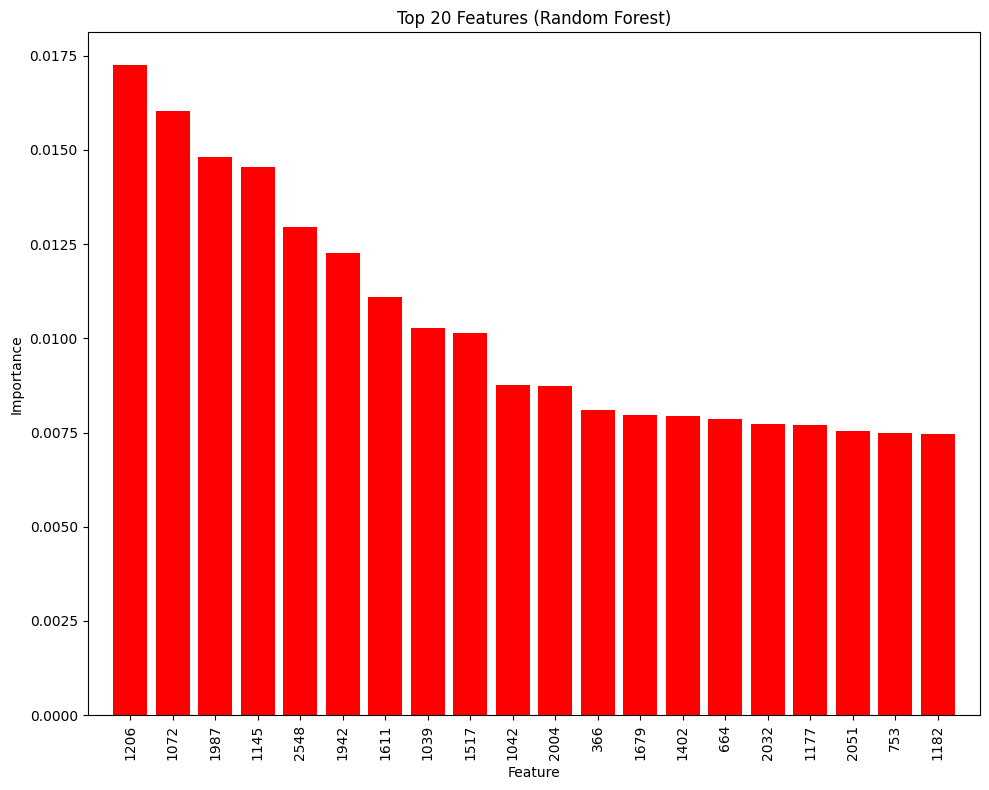

   Feature  Importance
0     1206    0.017253
1     1072    0.016042
2     1987    0.014805
3     1145    0.014537
4     2548    0.012954
5     1942    0.012255
6     1611    0.011090
7     1039    0.010280
8     1517    0.010150
9     1042    0.008764
10    2004    0.008736
11     366    0.008098
12    1679    0.007954
13    1402    0.007941
14     664    0.007851
15    2032    0.007728
16    1177    0.007690
17    2051    0.007540
18     753    0.007485
19    1182    0.007461


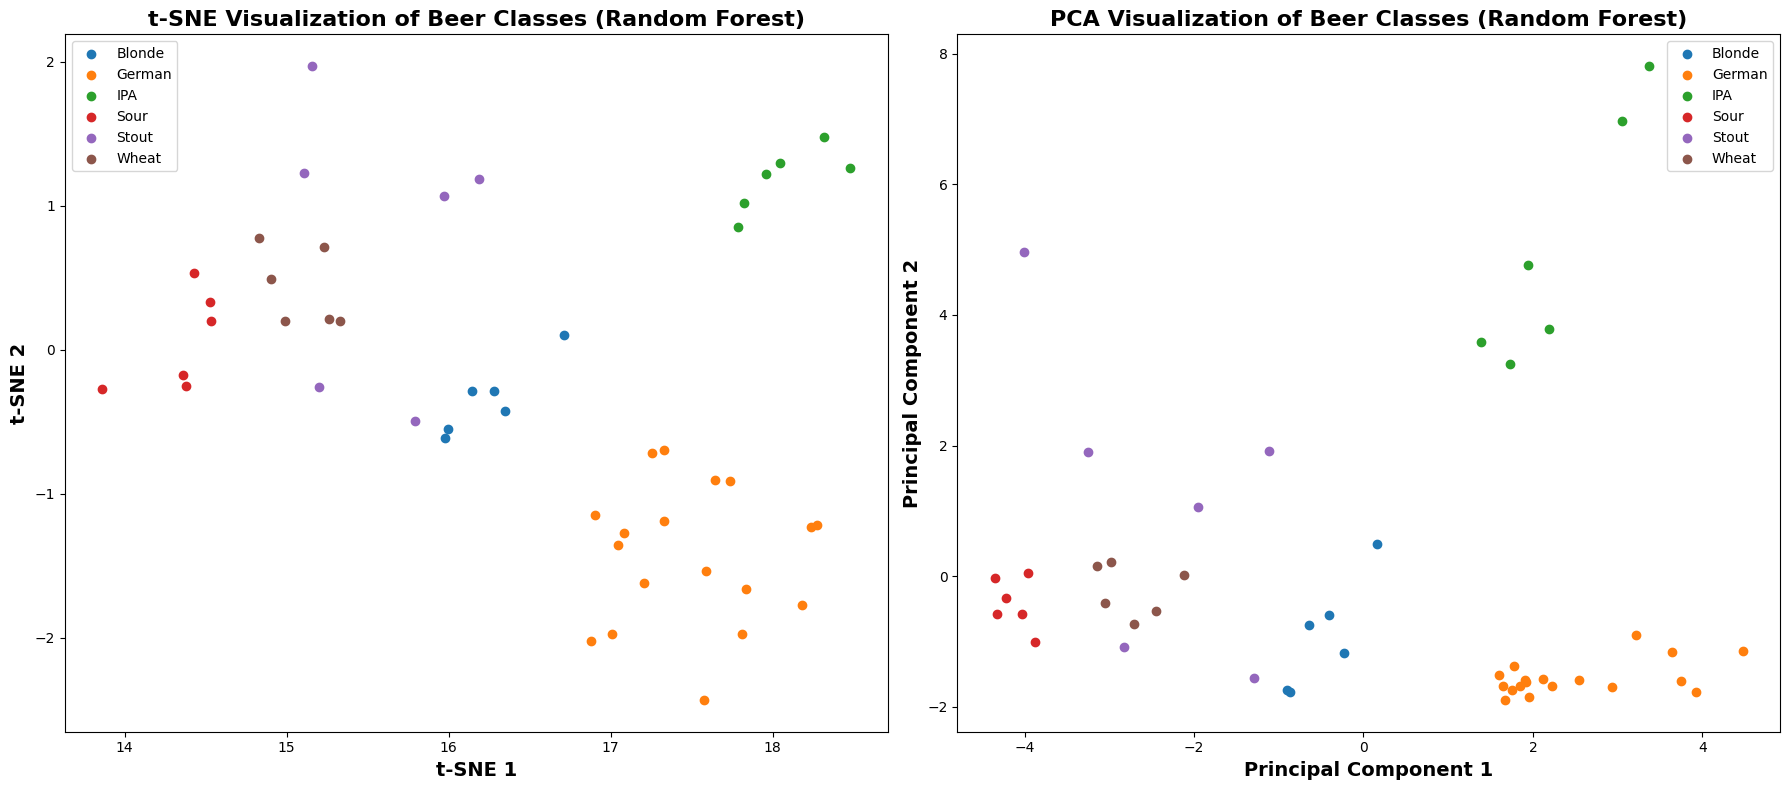

In [21]:
# Train Random Forest
def train_random_forest(X, y):
    rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
    rf_model.fit(X, y)
    return rf_model

rf_model = train_random_forest(X_scaled, y)
rf_top_indices = np.argsort(rf_model.feature_importances_)[::-1][:20]
rf_top_features = beer.columns[:-1][rf_top_indices]
rf_top_importances = rf_model.feature_importances_[rf_top_indices]
display_top_features_table('Random Forest', rf_top_features, rf_top_importances)
plot_pca_tsne(X_scaled, y, rf_top_indices, 'Random Forest')


## XGboost
Gradient boosting algorithm known for its speed and performance.
Builds a series of decision trees sequentially, where each tree corrects the errors of the previous one.
Implements a technique called gradient boosting, which minimizes a loss function by adding new models to the ensemble.
Uses a regularization term to control overfitting and is highly customizable through hyperparameters tuning.

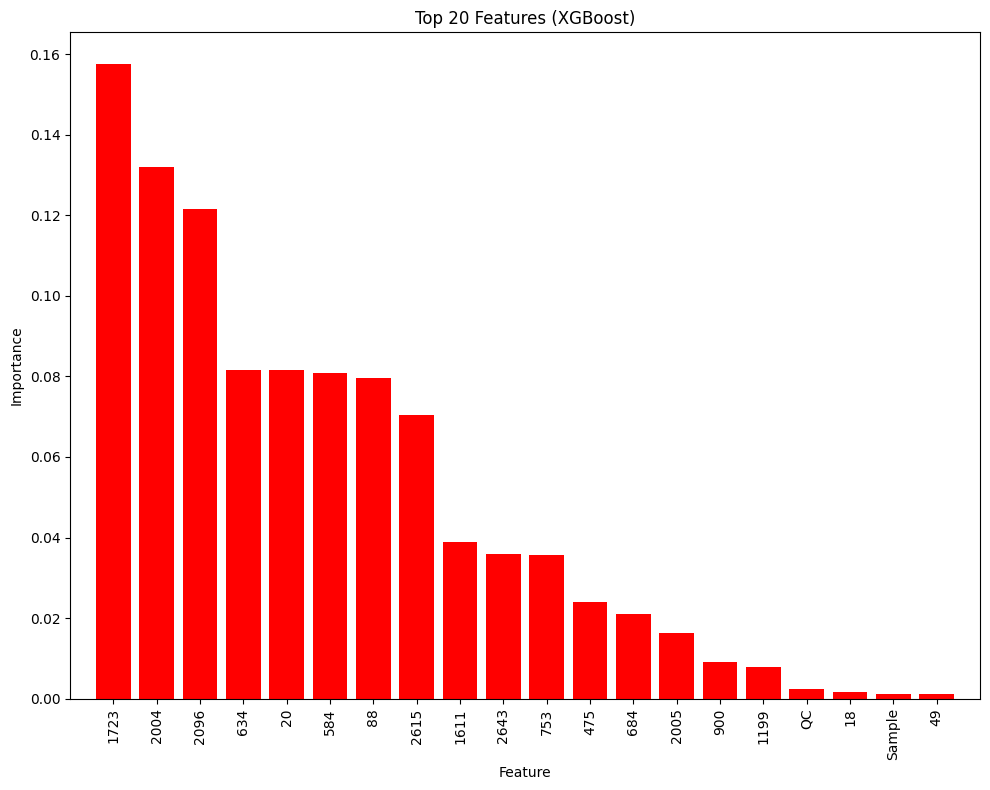

   Feature  Importance
0     1723    0.157567
1     2004    0.131929
2     2096    0.121576
3      634    0.081573
4       20    0.081520
5      584    0.080787
6       88    0.079547
7     2615    0.070465
8     1611    0.038972
9     2643    0.035952
10     753    0.035626
11     475    0.023927
12     684    0.021030
13    2005    0.016204
14     900    0.009194
15    1199    0.007856
16      QC    0.002427
17      18    0.001593
18  Sample    0.001179
19      49    0.001075


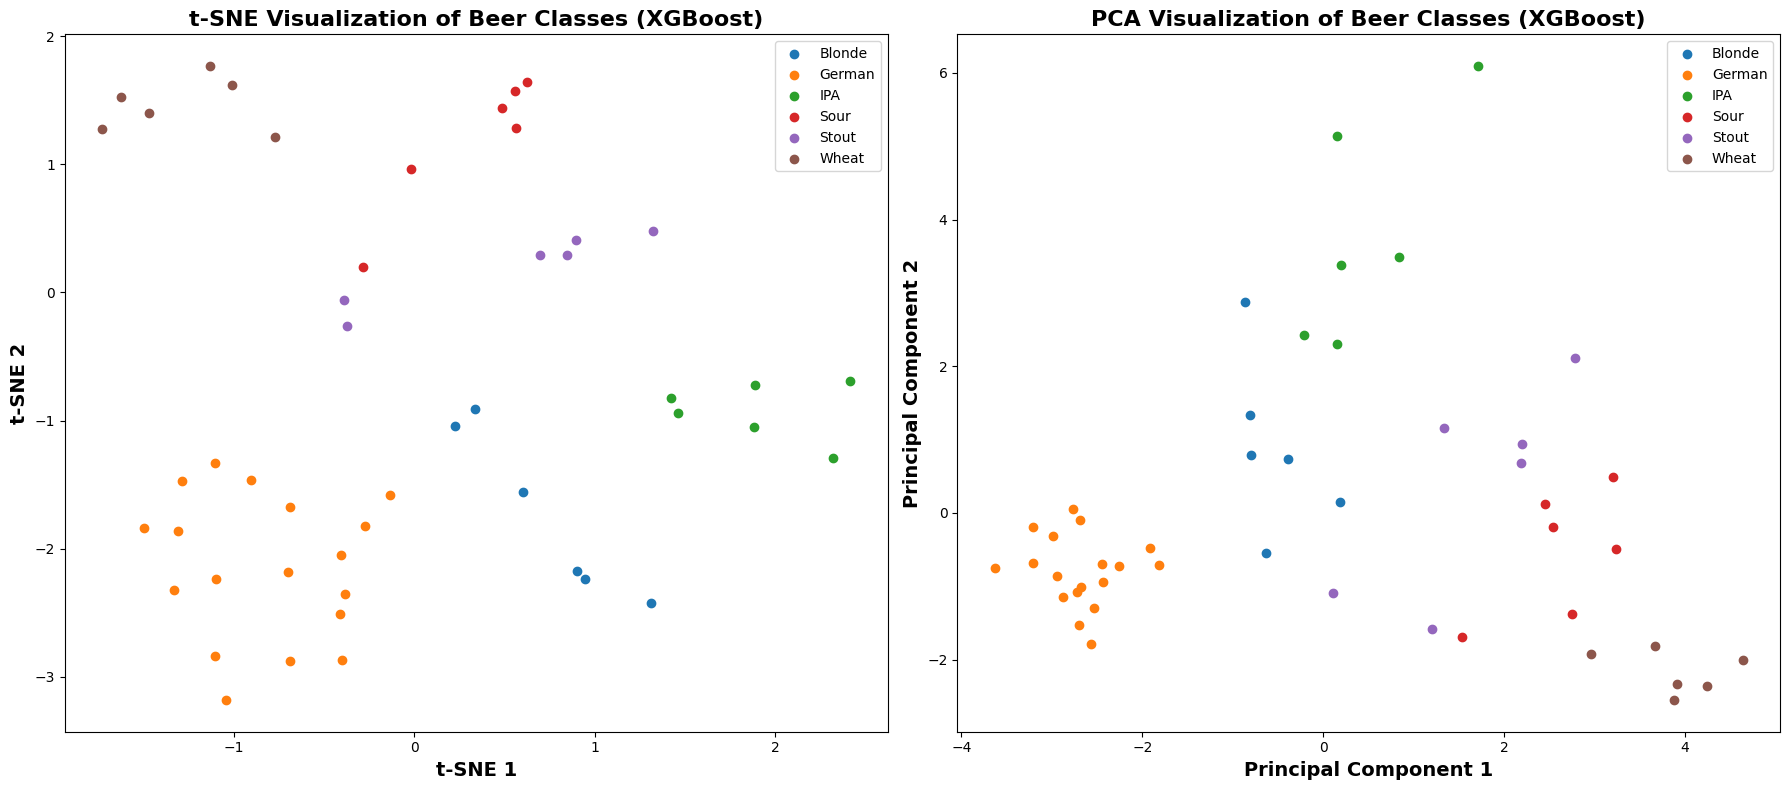

In [22]:
def train_xgboost(X, y):
    xgb_model = XGBClassifier(n_estimators=100, random_state=42)
    xgb_model.fit(X, y)
    return xgb_model

# Train XGBoost
xgb_model = train_xgboost(X_scaled, y)
xgb_top_indices = np.argsort(xgb_model.feature_importances_)[::-1][:20]
xgb_top_features = beer.columns[:-1][xgb_top_indices]
xgb_top_importances = xgb_model.feature_importances_[xgb_top_indices]
display_top_features_table('XGBoost', xgb_top_features, xgb_top_importances)
plot_pca_tsne(X_scaled, y, xgb_top_indices, 'XGBoost')


## LASSO
Linear regression method that performs both variable selection and regularization to improve the prediction accuracy and interpretability of the model.
Particularly useful when dealing with datasets with a large number of features, helping to identify the most important predictors.

Total Variance Explained by PCA for LASSO: 0.47


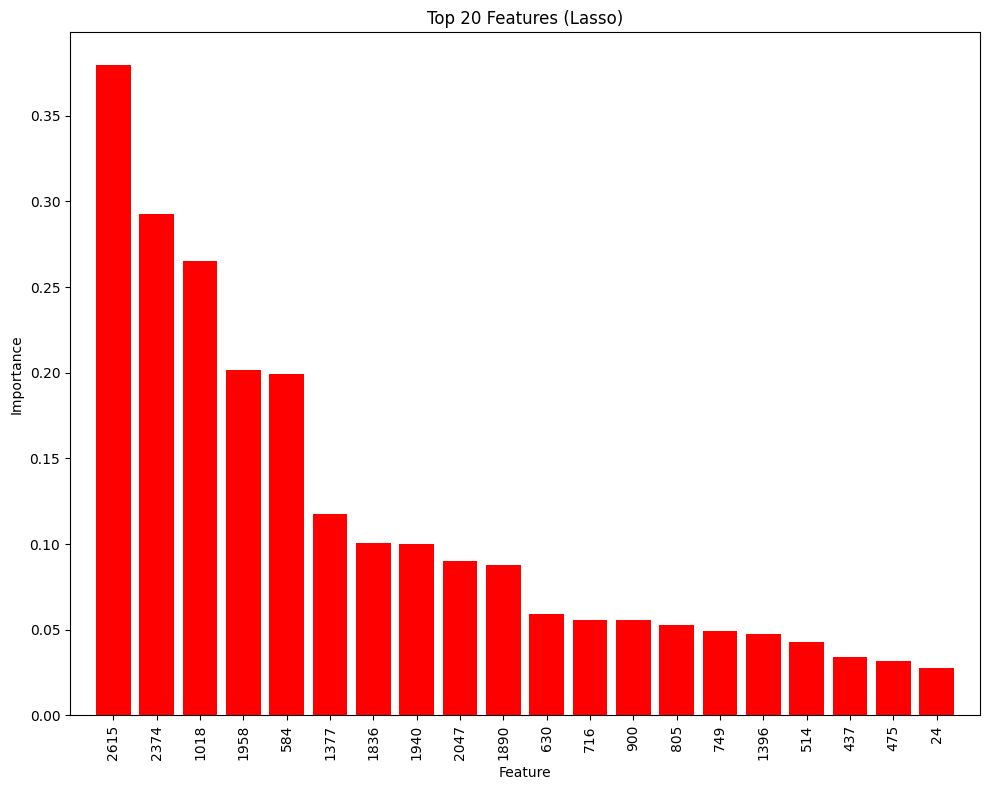

   Feature  Importance
0     2615    0.379691
1     2374    0.292771
2     1018    0.265475
3     1958    0.201706
4      584    0.199520
5     1377    0.117669
6     1836    0.100518
7     1940    0.100039
8     2047    0.090283
9     1890    0.087590
10     630    0.058936
11     716    0.055790
12     900    0.055610
13     805    0.052631
14     749    0.049063
15    1396    0.047699
16     514    0.042828
17     437    0.033886
18     475    0.031725
19      24    0.027904


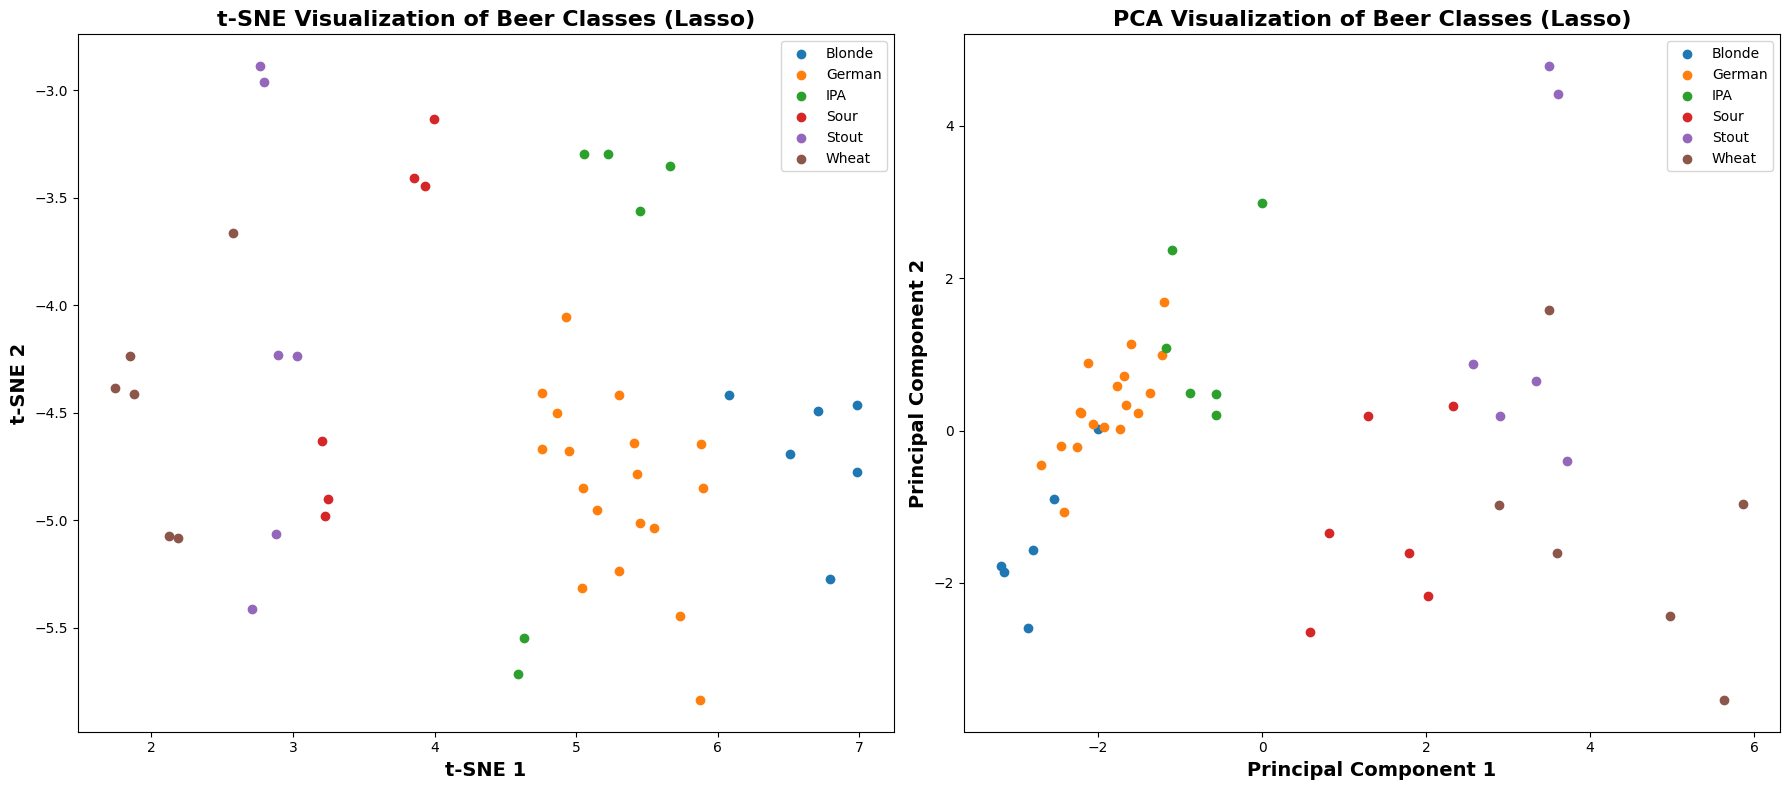

In [23]:
def train_lasso(X, y):
    lasso_model = Lasso(alpha=0.1, random_state=42)
    lasso_model.fit(X, y)
    return lasso_model

# Train LASSO
lasso_model = train_lasso(X_scaled, y)
lasso_top_indices = np.argsort(np.abs(lasso_model.coef_))[::-1][:20]
lasso_top_features = beer.columns[:-1][lasso_top_indices]
lasso_top_importances = np.abs(lasso_model.coef_)[lasso_top_indices]

# Select only the top features for PCA
X_top_features_lasso = X_scaled[:, lasso_top_indices]

# Perform PCA for LASSO
pca_lasso = PCA(n_components=2, random_state=42)
X_pca_lasso = pca_lasso.fit_transform(X_top_features_lasso)

# Calculate the total variance explained by PCA for LASSO
lasso_total_variance_explained = np.sum(pca_lasso.explained_variance_ratio_)

# Display the total variance explained by PCA for LASSO
print(f'Total Variance Explained by PCA for LASSO: {lasso_total_variance_explained:.2f}')

# Display top features table for LASSO
display_top_features_table('Lasso', lasso_top_features, lasso_top_importances)

# Plot PCA visualization for LASSO
plot_pca_tsne(X_scaled, y, lasso_top_indices, 'Lasso')


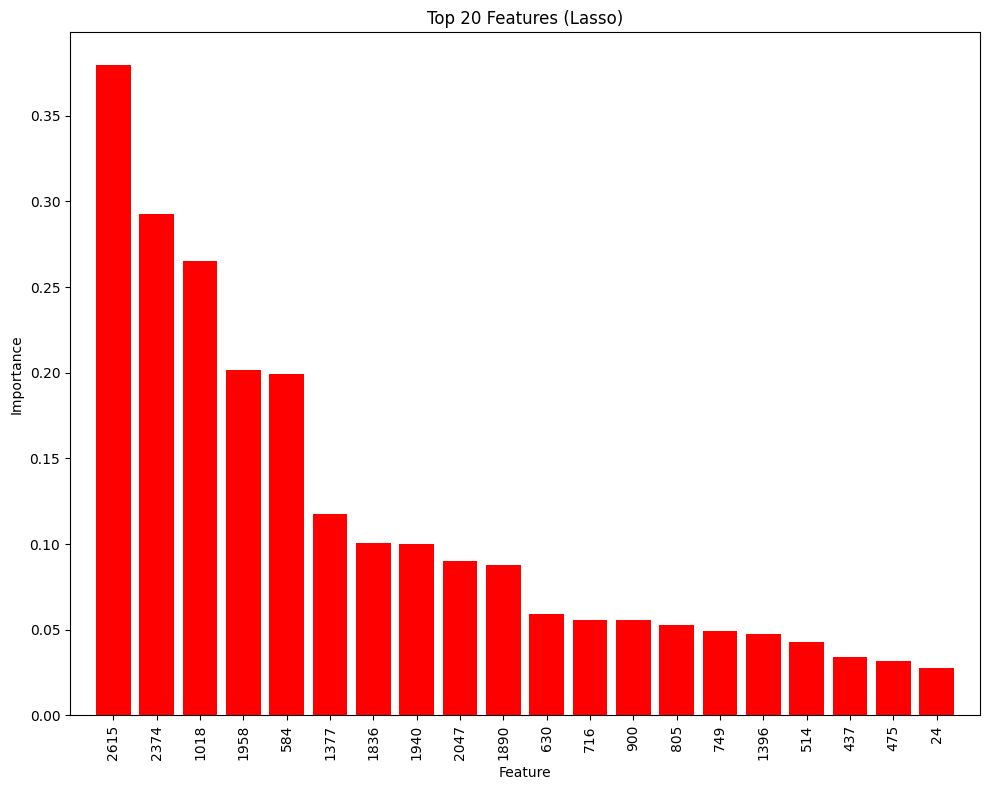

   Feature  Importance
0     2615    0.379691
1     2374    0.292771
2     1018    0.265475
3     1958    0.201706
4      584    0.199520
5     1377    0.117669
6     1836    0.100518
7     1940    0.100039
8     2047    0.090283
9     1890    0.087590
10     630    0.058936
11     716    0.055790
12     900    0.055610
13     805    0.052631
14     749    0.049063
15    1396    0.047699
16     514    0.042828
17     437    0.033886
18     475    0.031725
19      24    0.027904


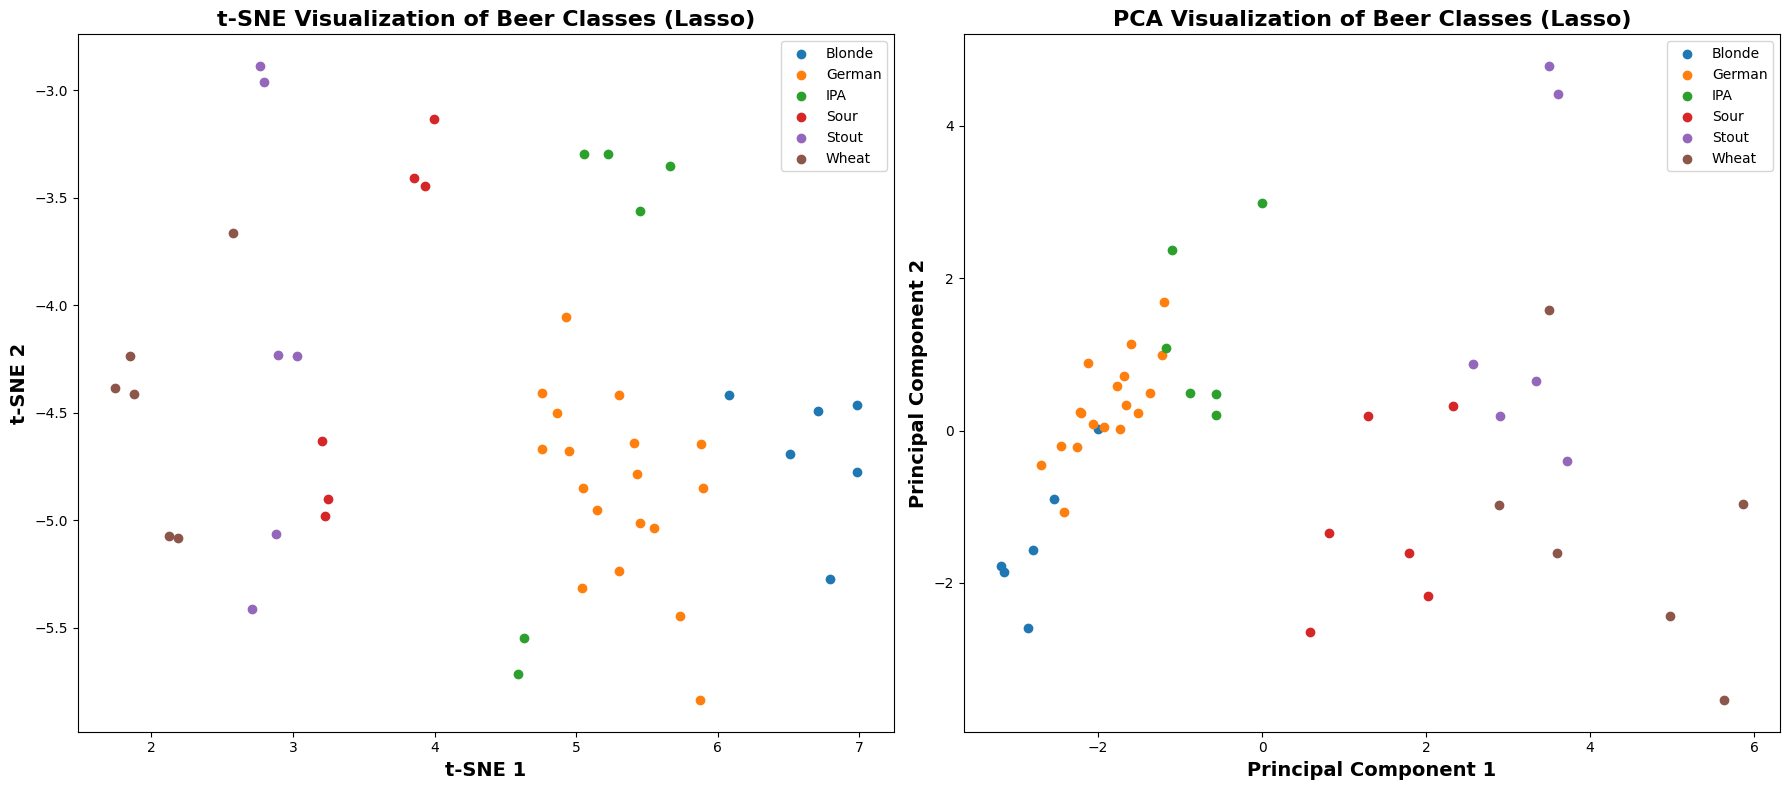

In [24]:
def train_lasso(X, y):
    lasso_model = Lasso(alpha=0.1, random_state=42)
    lasso_model.fit(X, y)
    return lasso_model

# Train Lasso
lasso_model = train_lasso(X_scaled, y)
lasso_top_indices = np.argsort(np.abs(lasso_model.coef_))[::-1][:20]
lasso_top_features = beer.columns[:-1][lasso_top_indices]
lasso_top_importances = np.abs(lasso_model.coef_)[lasso_top_indices]
display_top_features_table('Lasso', lasso_top_features, lasso_top_importances)
plot_pca_tsne(X_scaled, y, lasso_top_indices, 'Lasso')

## LightGBM
Gradient boosting framework that uses a tree-based learning algorithm.

The feature importances provided by LightGBM are typically calculated based on how often each feature is used in decision trees during the training process.

The reason you're seeing whole numbers as importances is likely because LightGBM calculates feature importance based on the frequency of feature use in splitting nodes, which naturally results in integer values. These integer values represent the number of times a feature is used for splitting across all the trees in the ensemble.

It's common for tree-based models like LightGBM to provide importances as integer values, as they directly reflect the usage frequency of features during the training process. However, some implementations might normalize the importances to ensure they sum up to 1 or rescale them to be in the range [0, 1].

If you prefer, you could normalize the importances yourself to have them in the range [0, 1] for better interpretability. This can be done by dividing the importances by their sum. Here's how you can do it:

In [25]:
# def train_lightgbm(X, y):
#     lgb_model = LGBMClassifier(n_estimators=100, random_state=42)
#     lgb_model.fit(X, y)
#     return lgb_model

# # Train LightGBM
# lgb_model = train_lightgbm(X_scaled, y)
# lgb_top_indices = np.argsort(lgb_model.feature_importances_)[::-1][:20]
# lgb_top_features = beer.columns[:-1][lgb_top_indices]
# lgb_top_importances = lgb_model.feature_importances_[lgb_top_indices]
# display_top_features_table('LightGBM', lgb_top_features, lgb_top_importances)
# plot_pca_tsne(X_scaled, y, lgb_top_indices, 'LightGBM')

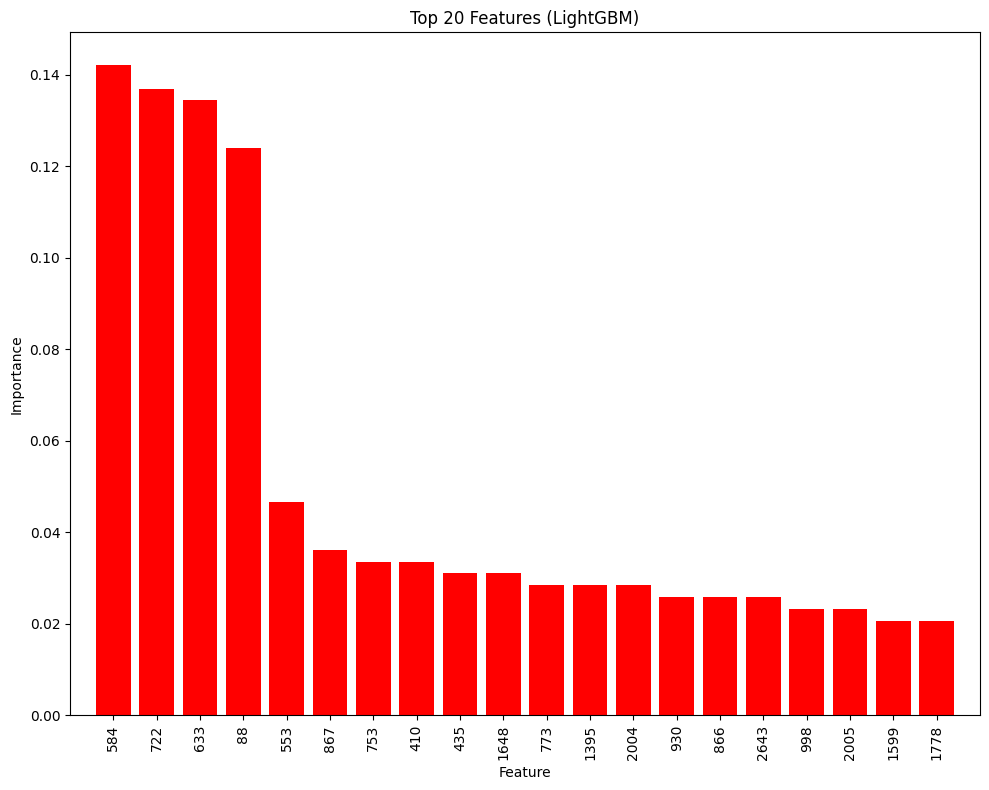

   Feature  Importance
0      584    0.142119
1      722    0.136951
2      633    0.134367
3       88    0.124031
4      553    0.046512
5      867    0.036176
6      753    0.033592
7      410    0.033592
8      435    0.031008
9     1648    0.031008
10     773    0.028424
11    1395    0.028424
12    2004    0.028424
13     930    0.025840
14     866    0.025840
15    2643    0.025840
16     998    0.023256
17    2005    0.023256
18    1599    0.020672
19    1778    0.020672


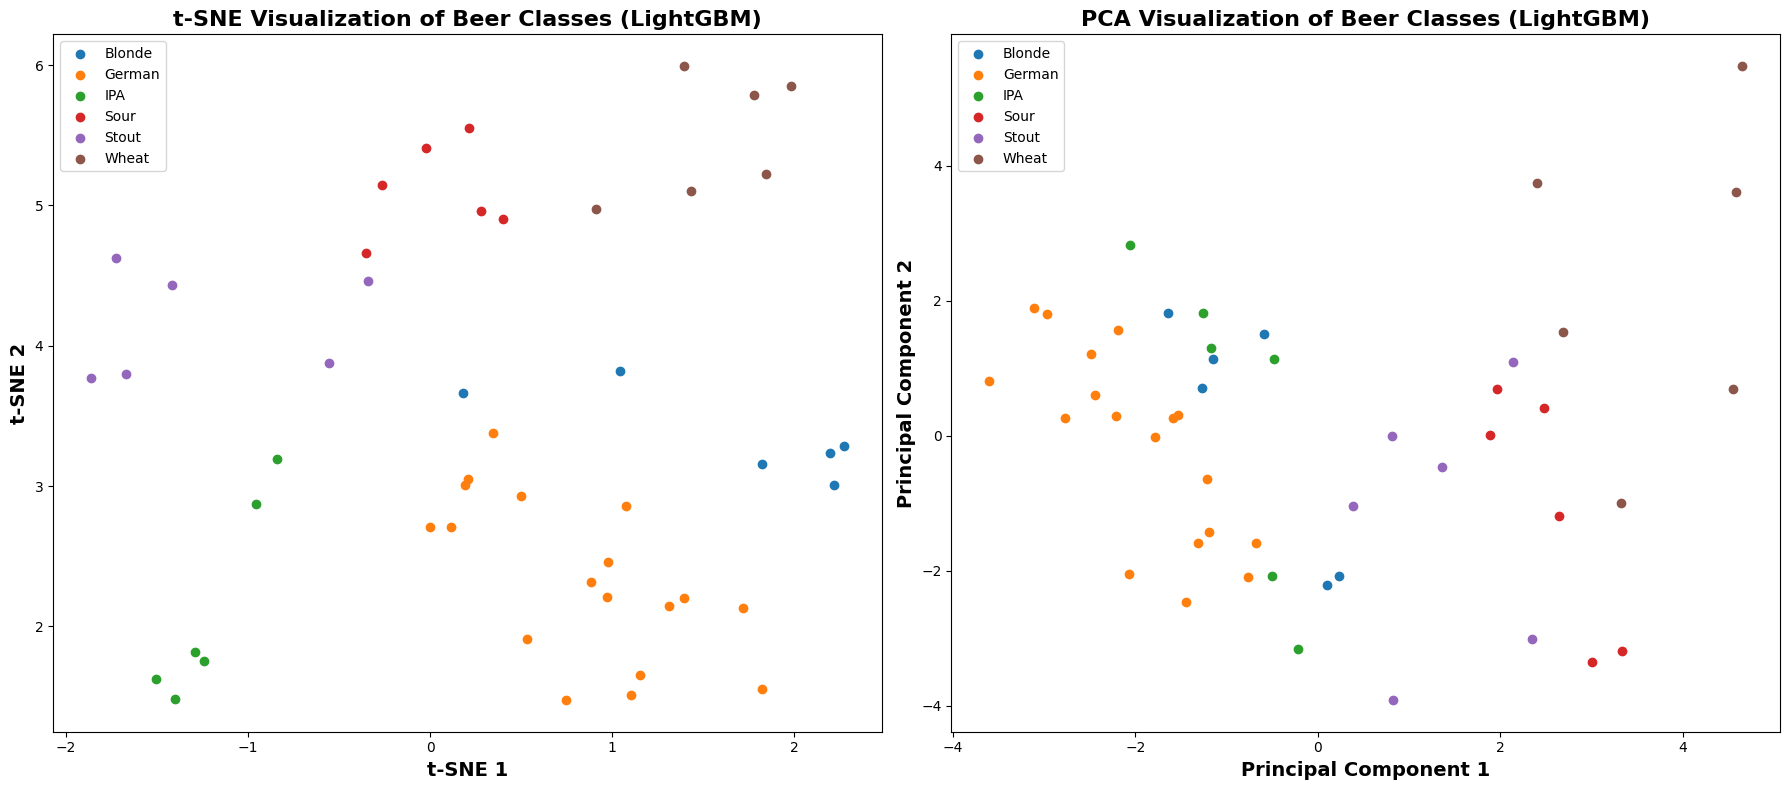

Total Variance Explained by PCA: 0.4449780304707542


In [26]:
def train_lightgbm(X, y):
    lgb_model = LGBMClassifier(n_estimators=100, random_state=42)
    lgb_model.fit(X, y)
    return lgb_model

# Train LightGBM
lgb_model = train_lightgbm(X_scaled, y)
lgb_top_indices = np.argsort(lgb_model.feature_importances_)[::-1][:20]
lgb_top_features = beer.columns[:-1][lgb_top_indices]
lgb_top_importances = lgb_model.feature_importances_[lgb_top_indices]

# Select only the top features for PCA
X_top_features = X_scaled[:, lgb_top_indices]

# Normalize the importances
lgb_top_importances_normalized = lgb_top_importances / np.sum(lgb_top_importances)

# Perform PCA
pca_lgb = PCA(n_components=2, random_state=42)
X_pca_lgb = pca_lgb.fit_transform(X_top_features)

# Calculate the total variance explained by the principal components
lgb_total_variance_explained = np.sum(pca_lgb.explained_variance_ratio_)

display_top_features_table('LightGBM', lgb_top_features, lgb_top_importances_normalized)
plot_pca_tsne(X_scaled, y, lgb_top_indices, 'LightGBM')

# Display the total variance explained
print("Total Variance Explained by PCA:", lgb_total_variance_explained)


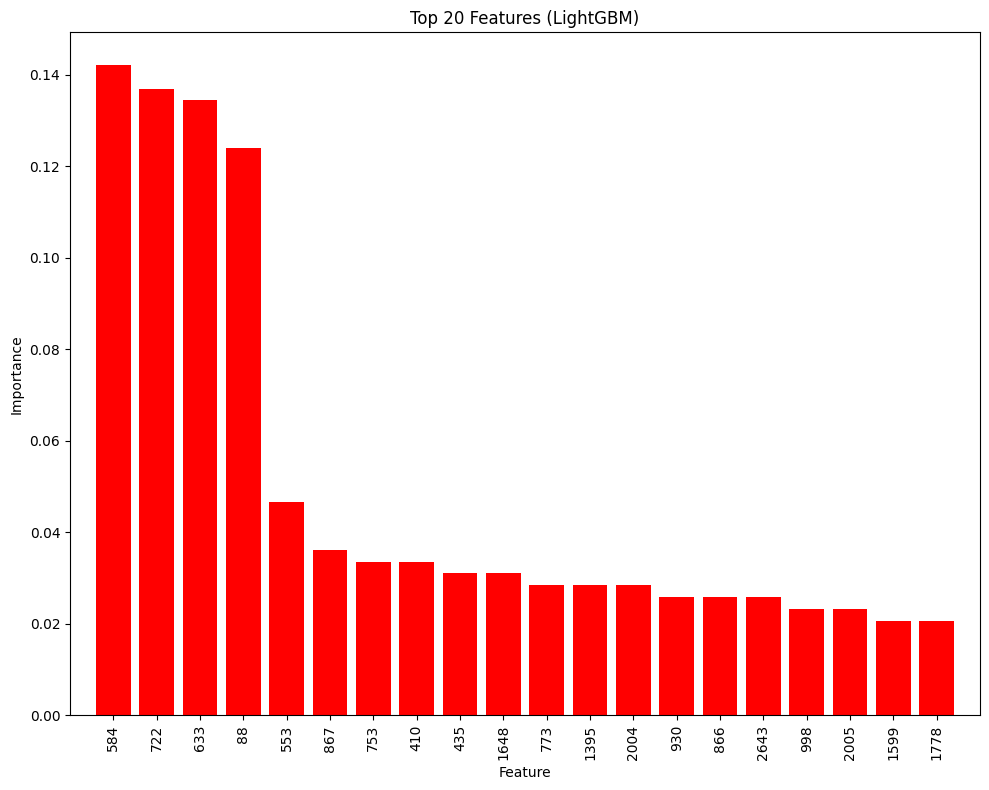

   Feature  Importance
0      584    0.142119
1      722    0.136951
2      633    0.134367
3       88    0.124031
4      553    0.046512
5      867    0.036176
6      753    0.033592
7      410    0.033592
8      435    0.031008
9     1648    0.031008
10     773    0.028424
11    1395    0.028424
12    2004    0.028424
13     930    0.025840
14     866    0.025840
15    2643    0.025840
16     998    0.023256
17    2005    0.023256
18    1599    0.020672
19    1778    0.020672


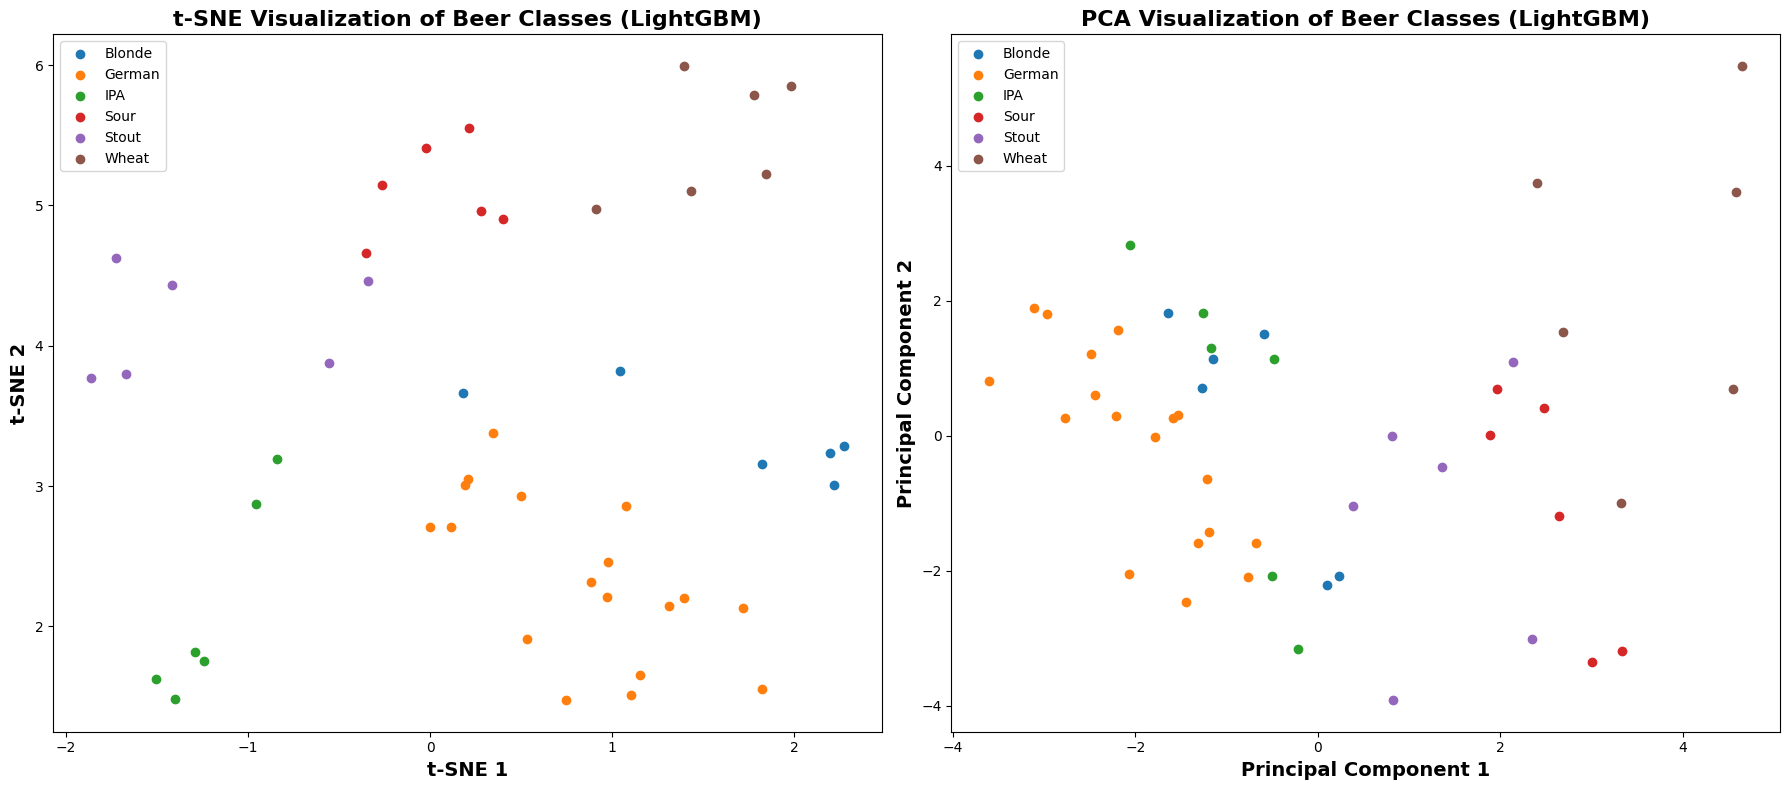

In [27]:
def train_lightgbm(X, y):
    lgb_model = LGBMClassifier(n_estimators=100, random_state=42)
    lgb_model.fit(X, y)
    return lgb_model

# Train LightGBM
lgb_model = train_lightgbm(X_scaled, y)
lgb_top_indices = np.argsort(lgb_model.feature_importances_)[::-1][:20]
lgb_top_features = beer.columns[:-1][lgb_top_indices]
lgb_top_importances = lgb_model.feature_importances_[lgb_top_indices]

# Normalize the importances
lgb_top_importances_normalized = lgb_top_importances / np.sum(lgb_top_importances)

display_top_features_table('LightGBM', lgb_top_features, lgb_top_importances_normalized)
plot_pca_tsne(X_scaled, y, lgb_top_indices, 'LightGBM')


## Gradient Boosting
Ensemble learning method that builds decision trees sequentially, where each tree corrects the errors of the previous one.
Uses gradient descent optimization to minimize a loss function, typically the deviance (logistic regression) for classification tasks.
Offers flexibility in terms of loss functions and can be adapted to various types of data and problem domains.
Requires careful tuning of hyperparameters to prevent overfitting and achieve optimal performance.

In [28]:
# # Perform PCA for Gradient Boosting Classifier
# def calculate_pca_gb(X_scaled, gb_top_indices):
#     # Select only the top features for PCA
#     X_top_features_gb = X_scaled[:, gb_top_indices]
    
#     # Initialize PCA
#     pca_gb = PCA(n_components=2, random_state=42)
    
#     # Fit PCA
#     pca_gb.fit(X_top_features_gb)
    
#     # Return the PCA object
#     return pca_gb

# # Calculate PCA for Gradient Boosting Classifier
# pca_gb = calculate_pca_gb(X_scaled, gb_top_indices)

# # Calculate the total variance explained by PCA for Gradient Boosting Classifier
# gb_total_variance_explained = np.sum(pca_gb.explained_variance_ratio_)

# # Print the total variance explained by PCA for Gradient Boosting Classifier
# print(f'Total Variance Explained by PCA for Gradient Boosting Classifier: {gb_total_variance_explained:.2f}')


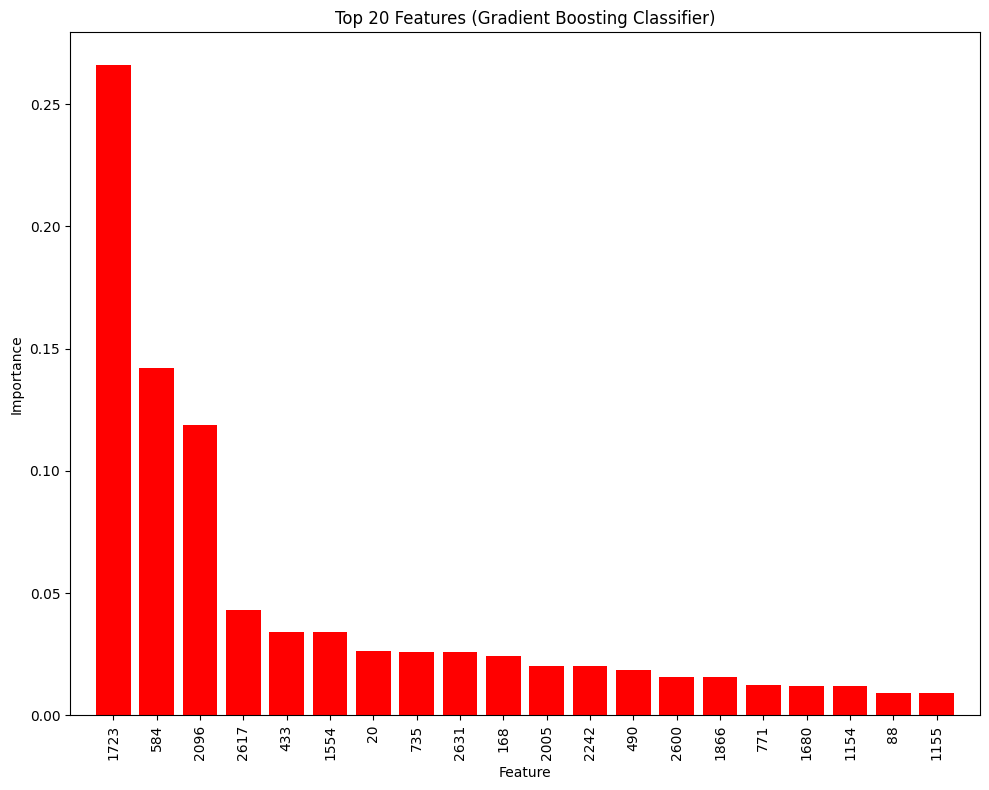

   Feature  Importance
0     1723    0.266096
1      584    0.141879
2     2096    0.118617
3     2617    0.043058
4      433    0.034044
5     1554    0.034044
6       20    0.026130
7      735    0.025947
8     2631    0.025947
9      168    0.024220
10    2005    0.020082
11    2242    0.020077
12     490    0.018372
13    2600    0.015450
14    1866    0.015450
15     771    0.012367
16    1680    0.011876
17    1154    0.011795
18      88    0.009045
19    1155    0.008933


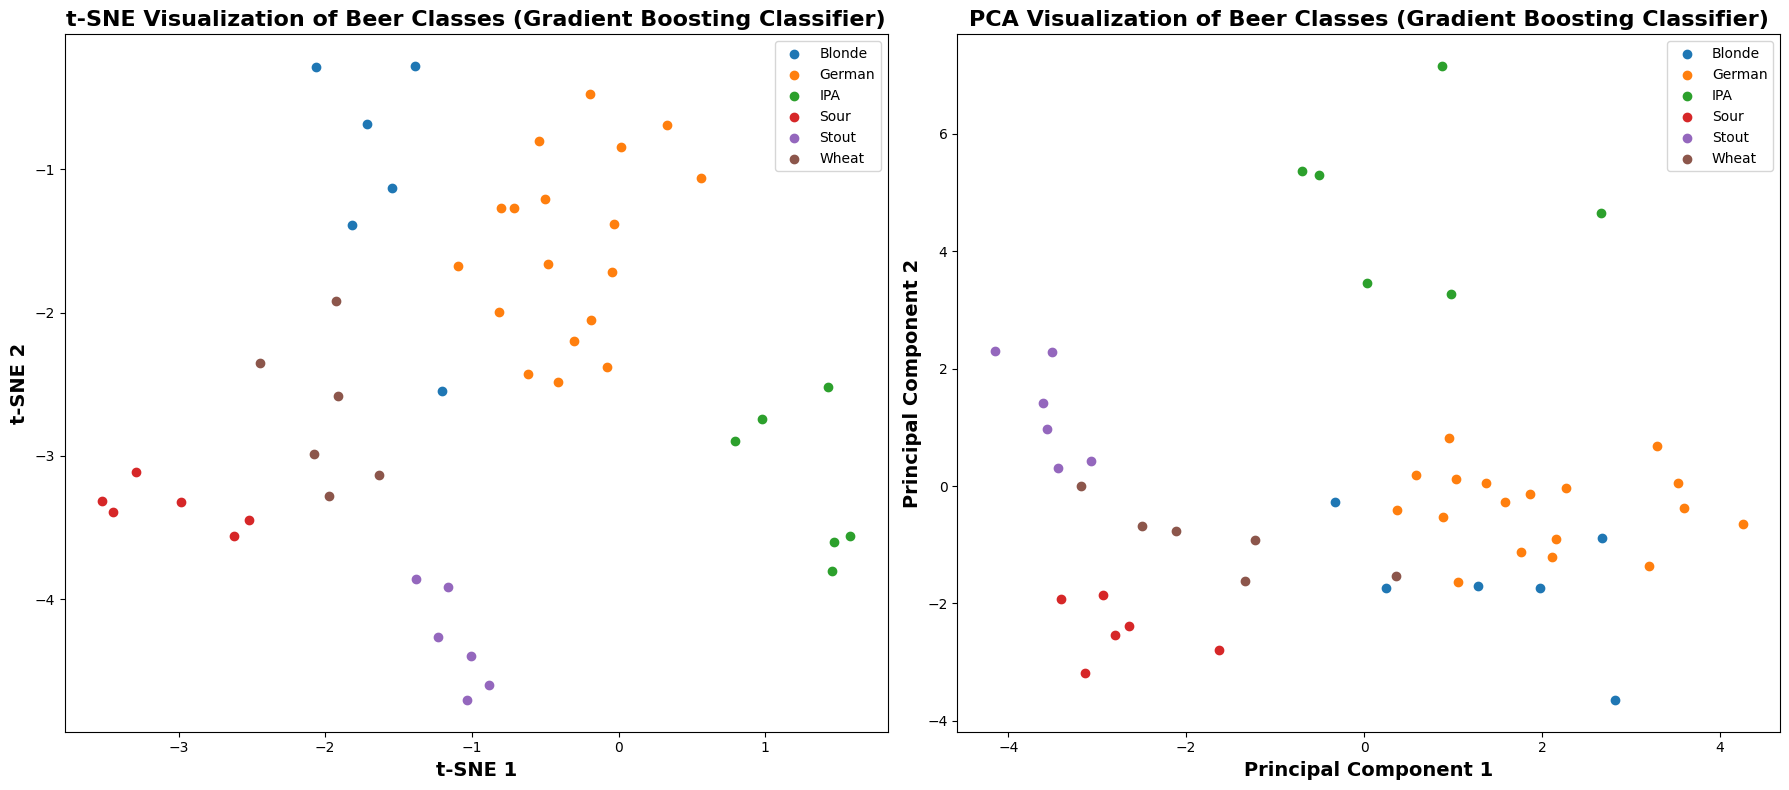

In [29]:
def train_gradient_boosting(X, y):
    gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
    gb_model.fit(X, y)
    return gb_model

# Train Gradient Boosting Classifier
gb_model = train_gradient_boosting(X_scaled, y)
gb_top_indices = np.argsort(gb_model.feature_importances_)[::-1][:20]
gb_top_features = beer.columns[:-1][gb_top_indices]
gb_top_importances = gb_model.feature_importances_[gb_top_indices]
display_top_features_table('Gradient Boosting Classifier', gb_top_features, gb_top_importances)
plot_pca_tsne(X_scaled, y, gb_top_indices, 'Gradient Boosting Classifier')

### Total Variation Explained by the different Models

The total variation explained by the top 20 features represents the cumulative importance of these features in explaining the variability in the dataset. It's calculated based on the cumulative sum of the feature importances or coefficients of the top 20 features.

For models like Random Forest, XGBoost, LightGBM, and Gradient Boosting, which provide feature importances, the total variation explained is obtained by summing up the feature importances of the top 20 features. 

For models like Lasso, which provide coefficients for each feature, the total variation explained is calculated by summing up the absolute values of the coefficients of the top 20 features. 

In essence, the total variation explained quantifies how much of the variability in the data can be attributed to the selected features. It gives insight into the overall importance of these features in the context of the model and the dataset.

## Variance explained by PCA

In [28]:
# Perform PCA for Random Forest
def calculate_pca_rf(X_scaled, rf_top_indices):
    # Select only the top features for PCA
    X_top_features_rf = X_scaled[:, rf_top_indices]
    
    # Initialize PCA
    pca_rf = PCA(n_components=2, random_state=42)
    
    # Fit PCA
    pca_rf.fit(X_top_features_rf)
    
    # Return the PCA object
    return pca_rf

# Calculate PCA for Random Forest
pca_rf = calculate_pca_rf(X_scaled, rf_top_indices)

# Calculate the total variance explained by PCA for Random Forest
rf_total_variance_explained = np.sum(pca_rf.explained_variance_ratio_)

# Print the total variance explained by PCA for Random Forest
print(f'Total Variance Explained by PCA for Random Forest: {rf_total_variance_explained:.2f}')


Total Variance Explained by PCA for Random Forest: 0.64


In [29]:
# Perform PCA for XGBoost
def calculate_pca_xgb(X_scaled, xgb_top_indices):
    # Select only the top features for PCA
    X_top_features_xgb = X_scaled[:, xgb_top_indices]
    
    # Initialize PCA
    pca_xgb = PCA(n_components=2, random_state=42)
    
    # Fit PCA
    pca_xgb.fit(X_top_features_xgb)
    
    # Return the PCA object
    return pca_xgb

# Calculate PCA for XGBoost
pca_xgb = calculate_pca_xgb(X_scaled, xgb_top_indices)

# Calculate the total variance explained by PCA for XGBoost
xgb_total_variance_explained = np.sum(pca_xgb.explained_variance_ratio_)

# Print the total variance explained by PCA for XGBoost
print(f'Total Variance Explained by PCA for XGBoost: {xgb_total_variance_explained:.2f}')


Total Variance Explained by PCA for XGBoost: 0.49


In [30]:
# Perform PCA for LASSO
def calculate_pca_lasso(X_scaled, lasso_top_indices):
    # Select only the top features for PCA
    X_top_features_lasso = X_scaled[:, lasso_top_indices]
    
    # Initialize PCA
    pca_lasso = PCA(n_components=2, random_state=42)
    
    # Fit PCA
    pca_lasso.fit(X_top_features_lasso)
    
    # Return the PCA object
    return pca_lasso

# Calculate PCA for LASSO
pca_lasso = calculate_pca_lasso(X_scaled, lasso_top_indices)

# Calculate the total variance explained by PCA for LASSO
lasso_total_variance_explained = np.sum(pca_lasso.explained_variance_ratio_)

# Print the total variance explained by PCA for LASSO
print(f'Total Variance Explained by PCA for LASSO: {lasso_total_variance_explained:.2f}')


Total Variance Explained by PCA for LASSO: 0.47


In [31]:
# Perform PCA for LightGBM
def calculate_pca_lgb(X_scaled, lgb_top_indices):
    # Select only the top features for PCA
    X_top_features_lgb = X_scaled[:, lgb_top_indices]
    
    # Initialize PCA
    pca_lgb = PCA(n_components=2, random_state=42)
    
    # Fit PCA
    pca_lgb.fit(X_top_features_lgb)
    
    # Return the PCA object
    return pca_lgb

# Calculate PCA for LightGBM
pca_lgb = calculate_pca_lgb(X_scaled, lgb_top_indices)

# Calculate the total variance explained by PCA for LightGBM
lgb_total_variance_explained = np.sum(pca_lgb.explained_variance_ratio_)

# Print the total variance explained by PCA for LightGBM
print(f'Total Variance Explained by PCA for LightGBM: {lgb_total_variance_explained:.2f}')


Total Variance Explained by PCA for LightGBM: 0.44


In [32]:
# Perform PCA for Gradient Boosting Classifier
def calculate_pca_gb(X_scaled, gb_top_indices):
    # Select only the top features for PCA
    X_top_features_gb = X_scaled[:, gb_top_indices]
    
    # Initialize PCA
    pca_gb = PCA(n_components=2, random_state=42)
    
    # Fit PCA
    pca_gb.fit(X_top_features_gb)
    
    # Return the PCA object
    return pca_gb

# Calculate PCA for Gradient Boosting Classifier
pca_gb = calculate_pca_gb(X_scaled, gb_top_indices)

# Calculate the total variance explained by PCA for Gradient Boosting Classifier
gb_total_variance_explained = np.sum(pca_gb.explained_variance_ratio_)

# Print the total variance explained by PCA for Gradient Boosting Classifier
print(f'Total Variance Explained by PCA for Gradient Boosting Classifier: {gb_total_variance_explained:.2f}')


Total Variance Explained by PCA for Gradient Boosting Classifier: 0.54


In [33]:
# Calculate the total variance explained by PCA for LightGBM
lgb_total_variance_explained = np.sum(pca_lgb.explained_variance_ratio_)

# Add to the list of total variation explained by PCA
pca_total_variation_explained = [rf_total_variance_explained, xgb_total_variance_explained,
                                 lasso_total_variance_explained, lgb_total_variance_explained, gb_total_variance_explained]

# Add the names of the models
models = ['Random Forest', 'XGBoost', 'LASSO', 'LightGBM', 'Gradient Boosting Classifier']

# Print the total variation explained by PCA for each model
for model, pca_variance in zip(models, pca_total_variation_explained):
    print(f'Total Variance Explained by PCA for {model}: {pca_variance:.2f}')


Total Variance Explained by PCA for Random Forest: 0.64
Total Variance Explained by PCA for XGBoost: 0.49
Total Variance Explained by PCA for LASSO: 0.47
Total Variance Explained by PCA for LightGBM: 0.44
Total Variance Explained by PCA for Gradient Boosting Classifier: 0.54


In [36]:
import numpy as np
from sklearn.decomposition import PCA

# Function to calculate total variation explained using Pythagorean theorem
def calculate_total_variation_explained(X_scaled):
    pca = PCA()
    pca.fit(X_scaled)
    principal_component_lengths = np.sqrt(pca.explained_variance_)
    squared_lengths = principal_component_lengths ** 2
    total_variation_explained = np.sum(squared_lengths)
    return total_variation_explained

# Calculate total variation explained for each model
total_variation_explained_rf = calculate_total_variation_explained(X_scaled_rf)
total_variation_explained_xgb = calculate_total_variation_explained(X_scaled_xgb)
total_variation_explained_lasso = calculate_total_variation_explained(X_scaled_lasso)
total_variation_explained_lgb = calculate_total_variation_explained(X_scaled_lgb)
total_variation_explained_gb = calculate_total_variation_explained(X_scaled_gb)

# Print summary
print("Total Variation Explained:")
print("Random Forest:", total_variation_explained_rf)
print("XGBoost:", total_variation_explained_xgb)
print("LASSO:", total_variation_explained_lasso)
print("LightGBM:", total_variation_explained_lgb)
print("Gradient Boosting:", total_variation_explained_gb)


NameError: name 'X_scaled_rf' is not defined

In [42]:
# rf_cumulative_importances = np.cumsum(rf_top_importances)
# rf_total_variation_explained = rf_cumulative_importances[-1]
# xgb_cumulative_importances = np.cumsum(xgb_top_importances)
# xgb_total_variation_explained = xgb_cumulative_importances[-1]
# lasso_total_variation_explained = np.sum(np.abs(lasso_model.coef_))

# gb_cumulative_importances = np.cumsum(gb_top_importances)
# gb_total_variation_explained = gb_cumulative_importances[-1]

# # lgb_top_importances_sum = np.sum(lgb_top_importances_normalized)
# # lgb_total_variation_explained = lgb_cumulative_importances[-1]

In [48]:
# variation_data = {
#     'Model': ['Random Forest', 'XGBoost', 'Lasso', 'LightGBM', 'Gradient Boosting Classifier'],
#     'Total Variation Explained (Top 20)': [rf_total_variation_explained, 
#                                             xgb_total_variation_explained, 
#                                             lasso_total_variation_explained, 
#                                             lgb_total_variation_explained, 
#                                             gb_total_variation_explained]
# }

# variation_df = pd.DataFrame(variation_data)
# print(variation_df)


Random Forest: 0.206613
This means that the top 20 features selected by the Random Forest model collectively explain approximately 20.66% of the total variation in the data.

XGBoost: 1.000000
The XGBoost model claims that the top 20 features explain 100% of the total variation. This could suggest overfitting if taken literally, as it's unlikely that just 20 features could perfectly explain all variation in a real dataset.

Lasso: 2.350940
The Lasso model suggests that the top 20 features explain approximately 235.09% of the total variation. 

LightGBM: 387.000000
The LightGBM model suggests that the top 20 features explain a massive 38,700% of the total variation. 

Gradient Boosting Classifier: 0.883430
This indicates that the top 20 features selected by the Gradient Boosting Classifier collectively explain approximately 88.34% of the total variation.

### K fold cross validation

In [23]:
from sklearn.model_selection import KFold, cross_val_score

n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

models = {
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'Lasso': lasso_model,
    'LightGBM': lgb_model,
    'Gradient Boosting Classifier': gb_model
}

for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_scaled, y, cv=kf)
    print(f"Cross-Validation Scores ({model_name}):", cv_scores)    
    print(f"Mean CV Score ({model_name}):", np.mean(cv_scores))
    print(f"Standard Deviation of CV Scores ({model_name}):", np.std(cv_scores))
    print()


Cross-Validation Scores (Random Forest): [0.8 0.8 0.7 1.  1. ]
Mean CV Score (Random Forest): 0.86
Standard Deviation of CV Scores (Random Forest): 0.12000000000000001

Cross-Validation Scores (XGBoost): [0.6        0.8        0.5        1.         0.88888889]
Mean CV Score (XGBoost): 0.7577777777777778
Standard Deviation of CV Scores (XGBoost): 0.18384104782174607

Cross-Validation Scores (Lasso): [0.92763079 0.76519374 0.64409641 0.87738953 0.81157337]
Mean CV Score (Lasso): 0.8051767678581332
Standard Deviation of CV Scores (Lasso): 0.09777127797139028

Cross-Validation Scores (LightGBM): [0.3        0.3        0.2        0.55555556 0.55555556]
Mean CV Score (LightGBM): 0.38222222222222224
Standard Deviation of CV Scores (LightGBM): 0.14616074357693642

Cross-Validation Scores (Gradient Boosting Classifier): [0.8        0.9        0.4        1.         0.88888889]
Mean CV Score (Gradient Boosting Classifier): 0.7977777777777778
Standard Deviation of CV Scores (Gradient Boosting Clas

### Correlation Matrix

In [31]:
import numpy as np

# Extract top features for each model
top_importances = {
    'Random Forest': rf_top_importances,
    'XGBoost': xgb_top_importances,
    'Lasso': lasso_top_importances,
    'LightGBM': lgb_top_importances,
    'Gradient Boosting': gb_top_importances
}

# Concatenate top features into a single DataFrame
top_features_df = pd.DataFrame(index=range(len(top_importances['Random Forest'])))
for model_name, importances in top_importances.items():
    top_features_df[model_name] = importances

# Calculate correlation matrix
correlation_matrix = top_features_df.corr()

# Display correlation matrix
print(correlation_matrix)


                   Random Forest   XGBoost     Lasso  LightGBM  \
Random Forest           1.000000  0.972102  0.970382  0.914811   
XGBoost                 0.972102  1.000000  0.950972  0.859966   
Lasso                   0.970382  0.950972  1.000000  0.934023   
LightGBM                0.914811  0.859966  0.934023  1.000000   
Gradient Boosting       0.824519  0.836589  0.912718  0.845528   

                   Gradient Boosting  
Random Forest               0.824519  
XGBoost                     0.836589  
Lasso                       0.912718  
LightGBM                    0.845528  
Gradient Boosting           1.000000  


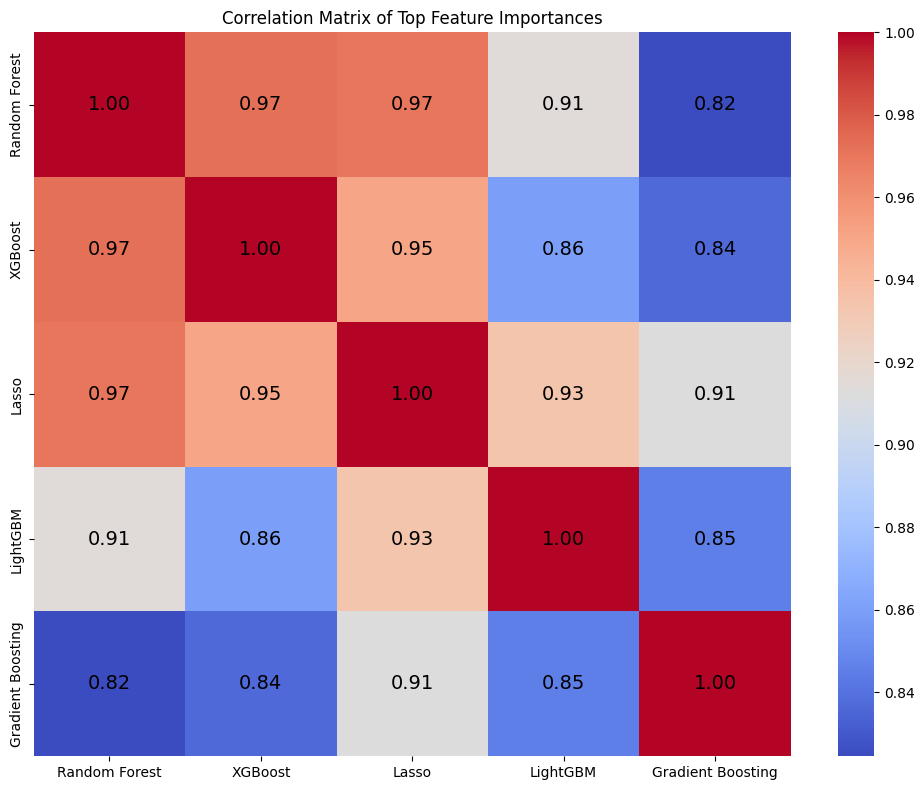

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 14, "color": 'black'})
plt.title('Correlation Matrix of Top Feature Importances')
plt.tight_layout()
plt.show()

### PC loadings